CPU times: user 42.8 ms, sys: 91 µs, total: 42.9 ms
Wall time: 44.7 ms


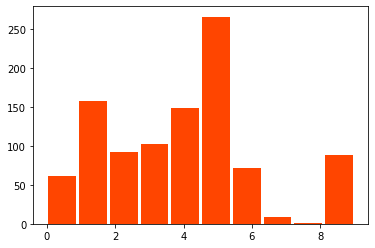

In [2]:
#1

import numpy as np
import matplotlib.pyplot as plt
from operator import itemgetter
%matplotlib inline
def generate(weights, size):
    weights = weights / weights.sum()
    uniform = np.random.uniform(size=size)
    res = np.zeros(size)
    for i in range(uniform.size):
        current_sum = 0
        for j in range(len(weights)):
            if weights[j] + current_sum >= uniform.flat[i]:
                res.flat[i] = j
                break
            current_sum += weights[j]
    return res


def generateord(weights, size):
    weights = weights / weights.sum()
    weights = list(enumerate(weights))
    weights.sort(key=itemgetter(1), reverse=True)
    
    uniform = np.random.uniform(size=size)
    res = np.zeros(size)
    for i in range(uniform.size):
        current_sum = 0
        for number, weight in weights:
            if weight + current_sum >= uniform.flat[i]:
                res.flat[i] = number
                break
            current_sum += weight
    
    return res

weights = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
x = generate(weights, 1000)
plt.hist(x, bins=10, color = 'orangered', rwidth=0.9)
%time x = generate(weights, 10000)

CPU times: user 20.9 ms, sys: 104 µs, total: 21 ms
Wall time: 21.6 ms


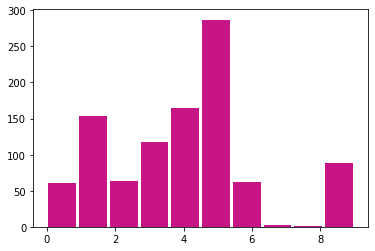

In [3]:
y = generateord(weights, 1000)
plt.hist(y, bins=10, color = 'mediumvioletred', rwidth=0.9)
%time y = generateord(weights, 10000)

In [0]:
#С упорядоченными весами время уменьшается более, чем в два раза.


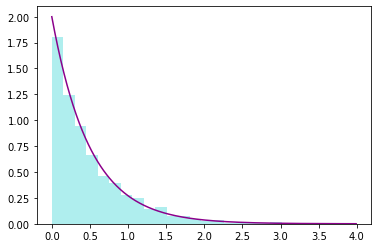

In [4]:
#2
import scipy.stats

a = 2
U = np.random.uniform(size=1000)
X = (-1)* np.log(1 - U) /a
plt.hist(X, density=True, color ='paleturquoise', bins=20)

r = np.arange(0, 4, .01)
plt.plot(r, scipy.stats.expon.pdf(r, scale=1 / a), color = 'darkmagenta')
plt.show()

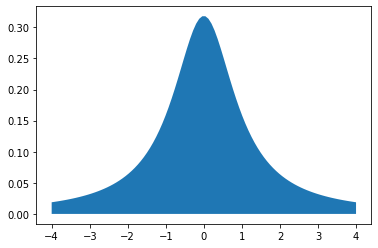

In [6]:
#3

from scipy import stats
dist = stats.cauchy()
x = np.linspace(-4, 4, 100)
plt.fill_between(x, 0, dist.pdf(x)) #needs to be normalized!
plt.show()

In [0]:
#Метод действительно производит выборку из нужного распределения, т.к мы выбираем точки равномерно из области под графиком f(x),
# а это и означает что получается выборка из f(x).

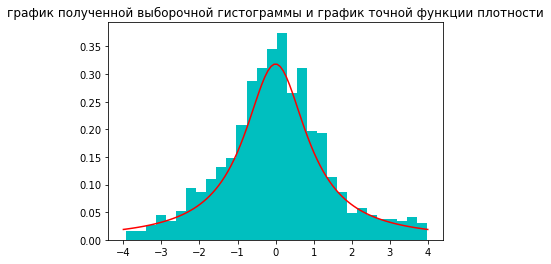

In [9]:
dist = stats.cauchy()
x = np.linspace(-4, 4, 100)
res = np.zeros(1000)    
j = 0

while(j != 1000):
    z = 8 * np.random.rand() - 4 
    u = np.random.rand()
    if (u <= dist.pdf(z) / (4 * 1/8)):
        res[j] = z
        j += 1
        
plt.hist(res, bins = 30, density = True, color = 'c')
plt.plot(x, dist.pdf(x), color = 'red')
plt.title("график полученной выборочной гистограммы и график точной функции плотности")
plt.show()

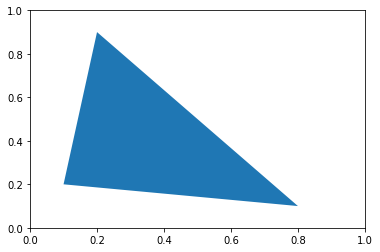

In [10]:
#4
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

polygon = Polygon(0.1 * np.array([[1, 2], [2, 9], [8, 1]]), True)
plt.gca().add_collection(PatchCollection([polygon]))
plt.show()


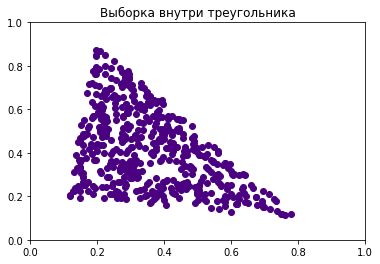

In [11]:
import math

xrand = np.array([np.random.rand() for i in range(500)])
yrand = np.array([np.random.rand() for i in range(500)])

for i in range(500):
    if yrand[i]>-xrand[i]+1:
        xrand[i]=-xrand[i]+1
        yrand[i]=-yrand[i]+1
        
xrand*=math.hypot(0.7, 0.1)
yrand*=math.hypot(0.7, 0.1)

a = math.atan2(-1, 7)
x = xrand
xrand = xrand*math.cos(a)-yrand*math.sin(a)+0.1
yrand = x*math.sin(a)+yrand*math.cos(a)+0.2

plt.scatter(xrand, yrand,color='indigo')
plt.xlim(left=0)
plt.xlim(right=1)
plt.ylim(bottom=0)
plt.ylim(top=1)
plt.title("Выборка внутри треугольника")
plt.show()

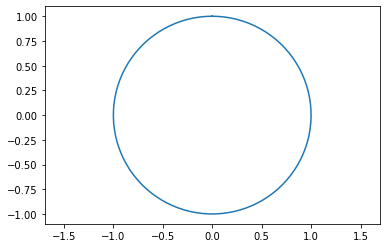

In [12]:
#5
t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.show()

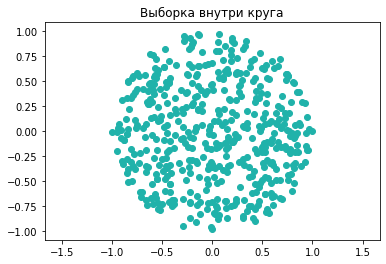

In [13]:
t = np.linspace(0, 2 * np.pi, 100)
angle = 2*math.pi*np.random.rand(1, 500)
rad = np.sqrt(np.random.rand(1, 500))

x_rand = rad*np.cos(angle)
y_rand = rad*np.sin(angle)

plt.scatter(x_rand, y_rand, color = 'lightseagreen')
plt.axis('equal')
plt.title("Выборка внутри круга")
plt.show()

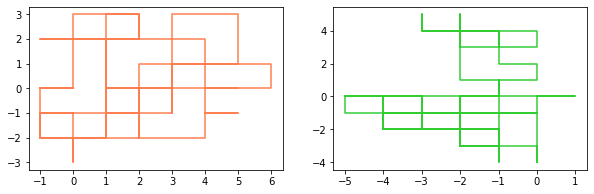

In [14]:
#6
import pylab
import random
n=100
xindex = np.zeros(100)
yindex = np.zeros(100)
def walk(n):
    xindex = np.random.choice(n, n//2, replace = False)
    yindex = np.random.choice(n, n//2, replace = False)

    x_ = x = np.array([sum([[1,-1][i in xindex] for i in range(n)][:j]) for j in range(n+1)])
    y = np.array([sum([[1,-1][i in yindex] for i in range(n)][:j]) for j in range(n+1)])
    
    x = x_*(1/2)+y*(1/2)
    y = x_*(-1/2)+y*(1/2)
    return x,y
x1,y1 = walk(100)
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.plot(x1,y1, color = 'coral')
x2,y2 = walk(100)
plt.subplot(1,2,2)
plt.plot(x2,y2, color = 'limegreen')
plt.show()

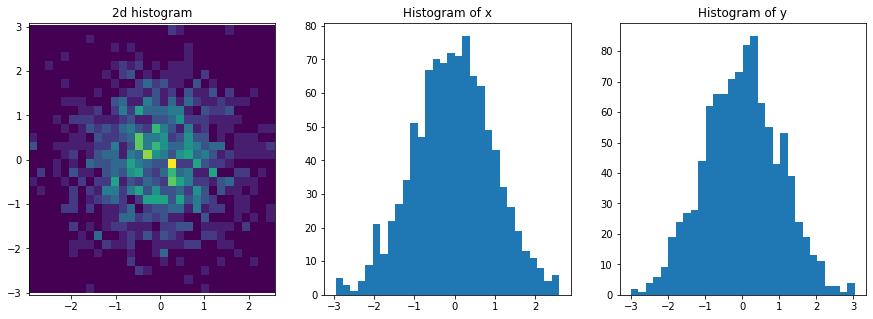

In [15]:
#7
n=1000
u1, u2 = np.random.rand(2, n)
r = np.sqrt(-2 * np.log(u1))
theta = 2 * np.pi * u2
x = r * np.cos(theta)
y = r * np.sin(theta)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

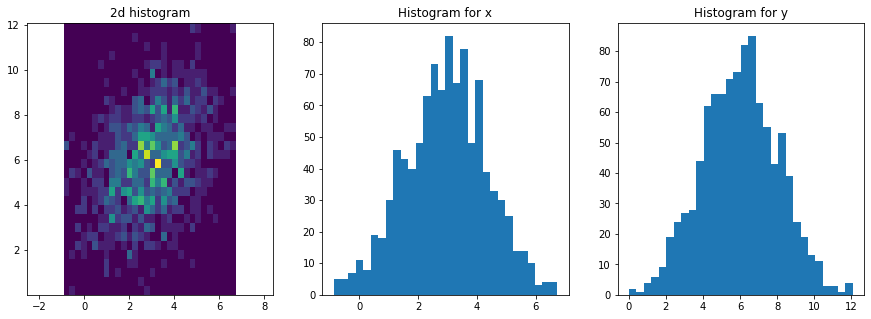

In [16]:
x1 = np.sqrt(7) / 2 * x + 1 / 2 * y + 3
y1 = 2 * y + 6

fig, ax1 = plt.subplots(1, 3, figsize=(15, 5))
ax1[0].hist2d(x1, y1, bins=30)
ax1[0].axis('Equal')
ax1[1].hist(x1, bins=30)
ax1[2].hist(y1, bins=30)
ax1[0].set_title("2d histogram")
ax1[1].set_title("Histogram for x")
ax1[2].set_title("Histogram for y")
plt.show()

In [17]:
np.mean(x1), np.mean(y1)

(2.941553319293824, 6.006144871835916)

In [18]:

np.cov([x1, y1])

array([[1.95858833, 1.00428984],
       [1.00428984, 4.1071684 ]])

In [0]:
#Практическое задание 

In [20]:
def K_generator(values, prob, n):
    K = np.random.choice(values, None, True, prob) 
    colors = np.zeros(n)
    for i in range(n):
        colors[i] = np.random.randint(1, K + 1)
    return len(np.unique(colors))

def B_generator(n):
    B = np.zeros(n+1)
    B[0]=1
    for i in range(1,n+1):
        sum = 0
        for j in range(i):
            sum += B[j] * math.factorial(i - 1) / (math.factorial(j) * math.factorial(i - 1 - j))
        B[i]=sum
    return B[n]

def P_generator(n):
    weights = np.zeros(n)
    s = 0
    for k in range(1, n + 1):
        weights[k - 1] = pow(k, n) / (math.factorial(k) * np.e * B_generator(n))
        s += weights[k - 1]
    prob=weights/s
    return prob

n = 100
values = 1 + np.arange(n)
prob = P_generator(n)

res = np.array([K_generator(values, prob, n) for i in range(1000)])
print("Ожидаемое число подмножеств = ", res.mean())

Ожидаемое число подмножеств =  28.644
